# Treelets Python Implementation

Python implementation of the treelets algorithm to cement my understanding. Working functions will be wrapped in a module and used to compare the treelets decomposition to PCA. 

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

In [2]:
sys.path.append("scripts/")
import python_treelet_implementation as pytree
import utils

## Workings

Example of the implementation applied to noise. Note that both original paper and CRAN implementation use the correlation between two variables a measure of their similarity. The parameter `abs_` controls whether the correlation or absolute correlation is used as a similarity measure. 

In [55]:
test_data = np.array([np.random.normal(0,1,400)])\
              .reshape(4,100)
np.cov(test_data)

array([[ 1.14096051,  0.03126564, -0.08997768,  0.3902533 ],
       [ 0.03126564,  0.96564481,  0.07784184,  0.19651287],
       [-0.08997768,  0.07784184,  0.89223271, -0.05984397],
       [ 0.3902533 ,  0.19651287, -0.05984397,  1.21191724]])

Build treelet decomposition.  

In [56]:
tree = pytree.treelet_decomposition(X = test_data, 
                                    L = 4)

At each level we can extract the treelet variance-covaraince matrix.  

In [57]:
tree[2]["C"]

array([[ 7.84576197e-01, -1.05972213e-01, -2.60865791e-02,
        -2.72862282e-02],
       [-1.05972213e-01,  9.22852576e-01,  1.01531433e-01,
         1.28028618e-17],
       [-2.60865791e-02,  1.01531433e-01,  8.92232714e-01,
        -8.21431342e-02],
       [-2.72862282e-02,  5.25570983e-17, -8.21431342e-02,
         1.61109377e+00]])

As well as which variables were merged and which was designated the sum variable. 

In [58]:
tree[2]["pair"]

(1, 3)

In [59]:
tree[2]["order"]

(0, 1)

## Comparison with CRAN test data

Python implementation applied to similarity matrix supplied with the package. Prior to applying the treelet transform no block structure is apparent.

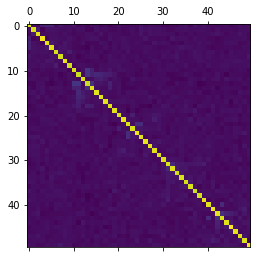

In [6]:
Ahat = pd.read_csv("../data/Ahat.csv")\
         .drop("Unnamed: 0", axis = 1)\
         .to_numpy()
plt.matshow(Ahat)

The implementation achieves the same treelet covaraince matrix (up to rounding errors) and varaible merges in the same order as code on CRAN. Even at low levels of the tree the block structure is apparent. 

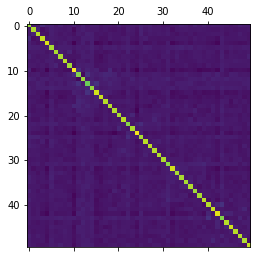

In [7]:
tree = pytree.treelet_decomposition(X = Ahat,
                                    L = 50)
plt.matshow(tree[10]["C"])

Using the absolute value of the correlation matrix lead to variable merges being performed a different order, and a different treelet decomposition. At low levels a block structure is still visible. 

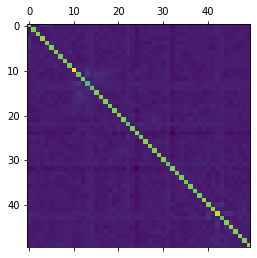

In [9]:
abs_tree = pytree.treelet_decomposition(X = Ahat,
                                        L = 50, 
                                        abs_ = True)
plt.matshow(abs_tree[10]["C"])